In [97]:
#Projekt 2 - Analyse Corona-Zahlen

import pandas as pd
import numpy as np
import datetime
import itertools
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

URL_CORONA_INFECTED = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_confirmed_global.csv"
URL_CORONA_RECOVER = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_recovered_global.csv"
URL_CORONA_DEATHS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_deaths_global.csv"


Infected=pd.read_csv(URL_CORONA_INFECTED)
Recovered=pd.read_csv(URL_CORONA_RECOVER)
Deaths=pd.read_csv(URL_CORONA_DEATHS)        
DataList= list(Infected.columns.values)
Infected.head(50)
#Infected.loc[Infected["Country/Region"]=="Canada"].groupby(["Country/Region"]).sum()
#Infected.loc[Infected["Country/Region"]=="Canada"].loc[Infected["Lat"]>0]["Lat"].mean()
 #df.drop[columns=["Province/State","Country/Region","Lat","Long"])
#Infected.iloc[,4:].sum(axis=0)
#Infected.groupby(["Country/Region"]).mean()
df=Infected
df=df.loc[df["Country/Region"]=="Canada"]
df.drop(columns=["Country/Region","Province/State","Lat","Long"]).sum()

#Infected.loc[Infected["Province/State"]=="Victoria"].drop(columns=["Province/State","Country/Region","Lat","Long"])


1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
5/19/20    80493
5/20/20    81575
5/21/20    82742
5/22/20    83947
5/23/20    85151
Length: 123, dtype: int64

Abruf am: 2020-05-24
#####################################
#  Information for Germany - total  #
#####################################
|Total Infected:	 179986 	|Total Recovered:	 159716 	|Total Daths:	 8261 	|
----------------------------------------------------------------------------------------------------
|Infected Today:	 276 	|Recovered Today:	 652 	|Deaths Today:	 33 	|
|Infected Mean Total:	 1463 	|Recovered Mean Total:	 1298 	|Deaths Mean Total:	 67 	|
|Infected Mean Week:	 516 	|Recovered Mean Week:	 815 	|Deaths Mean Week:	 42 	|
----------------------------------------------------------------------------------------------------
|Currently Ill:	 12009 	|Mean Ill Week:	 13205 	|Maximum Ill:	 72864 	|
|Treshold:	 2500 	|Days Above:	 28 	|Days Above Week:	 0 	|
----------------------------------------------------------------------------------------------------


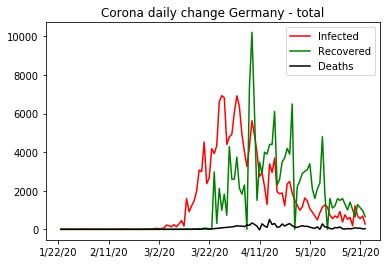

In [118]:
#Projekt 2 - Analyse Corona-Zahlen

import pandas as pd
import numpy as np
import datetime
import itertools
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

URL_CORONA_INFECTED = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_confirmed_global.csv"
URL_CORONA_RECOVER = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_recovered_global.csv"
URL_CORONA_DEATHS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" + \
                      "csse_covid_19_data/csse_covid_19_time_series/" + \
                      "time_series_covid19_deaths_global.csv"

class CountryData:
    def __init__(self,
                 df_Inf:pd.DataFrame,
                 df_Rec:pd.DataFrame,
                 df_Dea:pd.DataFrame,
                 country:str="total",
                 state:str="total",
                 treshold:int=1000):
        self.CountryName=country
        self.StateName=state
        self.Treshold=treshold     
        
        self.Latitude=0
        self.Longitude=0
        self.df_Infected=self.prepData(df_Inf,country,state)
        self.df_Recovered=self.prepData(df_Rec,country,state)
        self.df_Deaths=self.prepData(df_Dea,country,state)        
        self.df_Ill=self.df_Infected-self.df_Recovered-self.df_Deaths  
        
        self.Infected_Total=self.get_Total(self.df_Infected)
        self.Infected_Today=self.get_Today(self.df_Infected)
        self.Infected_Total_Mean=self.get_Total_Mean(self.df_Infected)
        self.Infected_Week_Mean=self.get_Week_Mean(self.df_Infected)
        
        self.Recovered_Total=self.get_Total(self.df_Recovered)     
        self.Recovered_Today=self.get_Today(self.df_Recovered)     
        self.Recovered_Total_Mean=self.get_Total_Mean(self.df_Recovered)     
        self.Recovered_Week_Mean=self.get_Week_Mean(self.df_Recovered)
        
        self.Deaths_Total=self.get_Total(self.df_Deaths)
        self.Deaths_Today=self.get_Today(self.df_Deaths)
        self.Deaths_Total_Mean=self.get_Total_Mean(self.df_Deaths)
        self.Deaths_Week_Mean=self.get_Week_Mean(self.df_Deaths)
        
        self.Ill_Currently=self.get_Total(self.df_Ill)    
        self.Ill_Week_Mean=self.get_Week_Mean_Number(self.df_Ill)
        self.Ill_Maximum=self.get_Maximum(self.df_Ill)
        self.Days_Above=self.get_Total_Above(self.df_Infected, self.Treshold)
        self.Days_Above_Week=self.get_Week_Above(self.df_Infected, self.Treshold)        
        
    def prepData(self,df:pd.DataFrame,country:str="total",state:str="total") -> pd.DataFrame:
        #specific state?        
        if (state != "total"):
           df=df.loc[df["Province/State"]==state]
           self.CountryName=df.iloc[0,1]
           self.Latitude=df.iloc[0,2]
           self.Longitude=df.iloc[0,3]
           return df.drop(columns=["Province/State","Country/Region","Lat","Long"]).sum()
        # specific country?
        if (country != "total"):
            df=df.loc[df["Country/Region"]==country]
            self.Latitude=df.loc[df["Lat"]>0]["Lat"].mean()
            self.Longitude=df.loc[df["Long"]>0]["Long"].mean()
            df.drop(columns=["Country/Region","Province/State","Lat","Long"])
            return df.drop(columns=["Country/Region","Province/State","Lat","Long"]).sum()
        #whole world sum
        return df.drop(columns=["Country/Region","Province/State","Lat","Long"]).sum()
        
    def get_Total(self,df:pd.DataFrame) -> int:
        return df.iloc[-1]
    
    def get_Today(self,df:pd.DataFrame) -> int:
        return df.iloc[-1]-df.iloc[-2]
    
    def get_Total_Mean(self,df:pd.DataFrame) -> int:
        return int((df.iloc[-1])/len(list(df)))
        
    def get_Week_Mean(self,df:pd.DataFrame) -> int:
        return int((df.iloc[-1]-df.iloc[-7])/7)
    
    def get_Week_Mean_Number(self,df:pd.DataFrame) -> int:
        return int((df.iloc[-7:].mean()))
    
    def get_Maximum(self,df:pd.DataFrame) -> int:
        return df.max()
        
    def get_Total_Above(self,df:pd.DataFrame,treshold:int) -> int:
        return(df[df.diff()>treshold].count().sum()) 
        #return(df[df.iloc[:,4:].diff(axis=1)>treshold].count().values.sum()) 
        
        
    def get_Week_Above(self,df:pd.DataFrame,treshold:int) -> int:   
        #print((df[-8:].diff()[-7:].astype(int)>500).sum())
        return((df[-8:].diff()[-7:].astype(int)>treshold).sum())
    
    
    def plot_data(self,ticks:int=20,log:bool=False):
        col=self.df_Infected.index[:]
        plt.title(str("Corona in " + self.CountryName + " - " +  self.StateName))
        plt.xticks(range(0,len(self.df_Infected),ticks), col[::ticks])
        if log == True: plt.yscale("log")
        plt.plot(col, self.df_Infected, "r", label ="Infected")
        plt.plot(col, self.df_Recovered, "g", label = "Recovered")
        plt.plot(col, self.df_Deaths, "k", label ="Deaths")
        plt.legend(loc="best")
        plt.show()
    
    def plot_current_infected(self,ticks:int=20,log:bool=False):
        col=self.df_Infected.index[:]
        plt.title(str("Corona current infected in " + self.CountryName + " - " +  self.StateName))
        plt.xticks(range(0,len(self.df_Infected),ticks), col[::ticks])
        if log == True: plt.yscale("log")
        plt.plot(col, self.df_Ill, "black", label ="Cur. Infected")
        plt.legend(loc="best")
        plt.show()
        
    def plot_diff(self,ticks:int=20,log:bool=False):
        col=self.df_Infected.index[:]
        plt.title(str("Corona daily change " + self.CountryName + " - " +  self.StateName))
        plt.xticks(range(0,len(self.df_Infected),ticks), col[::ticks])
        if log == True: plt.yscale("log")
        plt.plot(col, self.df_Infected.diff(), "r", label ="Infected")
        plt.plot(col, self.df_Recovered.diff(), "g", label = "Recovered")
        plt.plot(col, self.df_Deaths.diff(), "k", label ="Deaths")
        plt.legend(loc="best")
        plt.show()
        
    def plot_above_treshold(self,ticks:int=20,log:bool=False):
         
        col=self.df_Infected.index[:]
        plt.title(str("Corona daily change/ above treshold " + self.CountryName + " - " +  self.StateName))
        plt.xticks(range(0,len(self.df_Infected),ticks), col[::ticks])
        if log == True: plt.yscale("log")
        plt.plot(col, self.df_Infected.diff(), "r", label ="Infected")
        plt.legend(loc="best")
        plt.show()
       #hier noch ergänzen
    

class Corona:
    
    def __init__(self):
        self.Infected=pd.read_csv(URL_CORONA_INFECTED)
        self.Recovered=pd.read_csv(URL_CORONA_RECOVER)
        self.Deaths=pd.read_csv(URL_CORONA_DEATHS)        
        self.DataList= list(self.Infected.columns.values) 
    
        
    def print_CountryStatistic(self, 
                               country:str="total", 
                               state:str="total", 
                               treshold:int=1000)->CountryData:
        Country=CountryData(
                    self.Infected,
                    self.Recovered,
                    self.Deaths,
                    country,
                    state,
                    treshold)
        
        print("Abruf am:", datetime.date.today())
        title = "Information for " + Country.CountryName + " - " + Country.StateName
        print("".join(c for c in itertools.repeat("#", len(title) +6)))
        print("# ", title, " #")
        print("".join(c for c in itertools.repeat("#", len(title) +6)))
        
       #Total
        
        print("|Total Infected:\t",Country.Infected_Total,"\t", end="")
        print("|Total Recovered:\t",Country.Recovered_Total,"\t", end="")
        print("|Total Daths:\t",Country.Deaths_Total,"\t|")
        self.zwischenlinie()
        
        print("|Infected Today:\t",Country.Infected_Today,"\t", end="")
        print("|Recovered Today:\t",Country.Recovered_Today,"\t", end="")
        print("|Deaths Today:\t",Country.Deaths_Today,"\t|")
        print("|Infected Mean Total:\t",Country.Infected_Total_Mean,"\t", end="")
        print("|Recovered Mean Total:\t",Country.Recovered_Total_Mean,"\t", end="")
        print("|Deaths Mean Total:\t",Country.Deaths_Total_Mean,"\t|")
        print("|Infected Mean Week:\t",Country.Infected_Week_Mean,"\t", end="")
        print("|Recovered Mean Week:\t",Country.Recovered_Week_Mean,"\t", end="")
        print("|Deaths Mean Week:\t",Country.Deaths_Week_Mean,"\t|")       
        self.zwischenlinie()
        print("|Currently Ill:\t",Country.Ill_Currently,"\t", end="")
        print("|Mean Ill Week:\t",Country.Ill_Week_Mean,"\t", end="")
        print("|Maximum Ill:\t",Country.Ill_Maximum,"\t|")  
        print("|Treshold:\t",Country.Treshold,"\t", end="")
        print("|Days Above:\t",Country.Days_Above,"\t", end="")
        print("|Days Above Week:\t",Country.Days_Above_Week,"\t|")  
        self.zwischenlinie()
        return Country
        
    def zwischenlinie(self):
        print("".join(c for c in itertools.repeat("-", 100)))
    
        
def main():
    CoronaData=Corona()
    Country=CoronaData.print_CountryStatistic("Germany","total",2500)
    #Country.plot_data(20,False)        
    #Country.plot_current_infected(20,False)
    Country.plot_diff(20,False)
    
if __name__ == "__main__":
    main()